In [1]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.io as sio
from scipy import stats
from scipy.optimize import curve_fit
import pandas as pd
from distfit import distfit
from scipy.stats import skewnorm
from scipy.stats import norm
from scipy.stats import lognorm

In [2]:
# import list of best-performing flares
filename = '/Users/coletamburri/Desktop/Impulsiveness_Paper/imp_dev/all_and_best_Sep_2023.mat'
dat = sio.loadmat(filename)

In [3]:
plt.rcParams['text.usetex']=True
plt.rcParams['font.family']='sans-serif'
plt.rcParams['font.sans-serif'] = ['Tahoma']

In [7]:
all_imp = dat['curly_Is_relative']
best_imp_arr = dat['curly_Is_relative_best']
best_imp = best_imp_arr[:,0]
bestflaresname = dat['bestflaresname']


In [32]:
goes_flux = []
for i in range(len(bestflaresname)):
    
    string = bestflaresname[i][0][0]
    if string[-4] == 'B':
        pwr = 1e-7
    elif string[-4] == 'C':
        pwr = 1e-6
    elif string[-4] == 'M':
        pwr = 1e-5
    elif string[-4] == 'X':
        pwr = 1e-4
    
    mult = float(bestflaresname[i][0][0][-3:])
    
    flux = mult*pwr
    goes_flux.append(flux)
                 
                 

In [41]:
best_imp_arr[:,1]

array([1.000e+00, 5.000e+00, 6.000e+00, 9.000e+00, 1.200e+01, 1.500e+01,
       1.600e+01, 1.800e+01, 2.000e+01, 2.800e+01, 2.900e+01, 3.700e+01,
       3.800e+01, 4.000e+01, 4.300e+01, 4.500e+01, 4.600e+01, 4.700e+01,
       4.800e+01, 4.900e+01, 5.100e+01, 5.500e+01, 5.700e+01, 6.100e+01,
       7.000e+01, 7.400e+01, 7.800e+01, 8.300e+01, 9.200e+01, 9.400e+01,
       9.600e+01, 1.030e+02, 1.100e+02, 1.110e+02, 1.120e+02, 1.130e+02,
       1.140e+02, 1.190e+02, 1.220e+02, 1.240e+02, 1.250e+02, 1.260e+02,
       1.300e+02, 1.370e+02, 1.390e+02, 1.410e+02, 1.460e+02, 1.470e+02,
       1.480e+02, 1.490e+02, 1.510e+02, 1.520e+02, 1.530e+02, 1.570e+02,
       1.580e+02, 1.650e+02, 1.700e+02, 1.720e+02, 1.800e+02, 1.840e+02,
       1.870e+02, 1.930e+02, 2.000e+02, 2.020e+02, 2.040e+02, 2.060e+02,
       2.080e+02, 2.090e+02, 2.110e+02, 2.120e+02, 2.170e+02, 2.180e+02,
       2.250e+02, 2.280e+02, 2.290e+02, 2.320e+02, 2.420e+02, 2.430e+02,
       2.460e+02, 2.480e+02, 2.490e+02, 2.510e+02, 

In [39]:
bestflaresname

array([[array(['20100612_0030_11081_M2.0'], dtype='<U24')],
       [array(['20100807_1755_11093_M1.0'], dtype='<U24')],
       [array(['20100814_0938_11099_C4.4'], dtype='<U24')],
       [array(['20101016_1907_11112_M2.9'], dtype='<U24')],
       [array(['20101025_2206_11117_C2.3'], dtype='<U24')],
       [array(['20101111_0510_11121_C1.1'], dtype='<U24')],
       [array(['20101111_0715_11123_C4.7'], dtype='<U24')],
       [array(['20101111_1554_11123_C4.3'], dtype='<U24')],
       [array(['20101112_0128_11123_C4.6'], dtype='<U24')],
       [array(['20110121_0412_11149_C3.3'], dtype='<U24')],
       [array(['20110121_1517_11147_C1.1'], dtype='<U24')],
       [array(['20110213_1728_11158_M6.6'], dtype='<U24')],
       [array(['20110214_0235_11158_C1.6'], dtype='<U24')],
       [array(['20110214_0651_11158_C6.6'], dtype='<U24')],
       [array(['20110214_1241_11158_C9.4'], dtype='<U24')],
       [array(['20110214_1923_11158_C6.6'], dtype='<U24')],
       [array(['20110214_2314_11158_C1.2

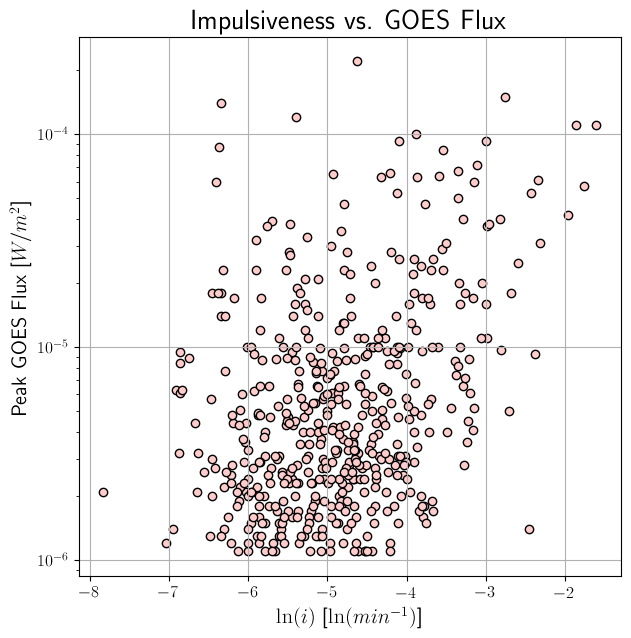

In [66]:
fig,ax = plt.subplots(figsize=(7,7))
ax.scatter(best_imp,goes_flux,facecolor='#FFCCCC',edgecolor='black')
ax.grid()
plt.yscale("log")
plt.yticks(fontsize=12)
plt.xticks(fontsize=12)
ax.set_xlabel('$\ln(i)$ [$\ln(min^{-1})$]',fontsize=15)
ax.set_ylabel('Peak GOES Flux [$W/m^2$]',fontsize=15)
ax.set_title('Impulsiveness vs. GOES Flux',fontsize=20)

plt.savefig('/Users/coletamburri/Desktop/imp_goes.png', dpi=300)

In [45]:
cc_imp_goes = np.corrcoef(best_imp,np.log10(goes_flux))[0,1]**2
print(cc_imp_goes)

0.1233555507727692
